In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error
from jarvis.db.figshare import data
%matplotlib inline

In [3]:
df_pred = pd.read_csv("/scratch/yll6162/CrossPropertyTL/pred/alignn_bert-base-uncased_chemnlp_prop_formation_energy_peratom_pred_otf.csv", index_col = 0)
mean_absolute_error(df_pred['labels'], df_pred['predictions'])

0.034696135853296436

In [9]:
#Datasize
props = ['ehull','slme', 'spillage', 'magmom_outcar','mbj_bandgap', 'Tc_supercon']
llm = "robo"
for prop in props:
    t_file_path = f"/scratch/yll6162/atomgpt/data/dataset_bert-base-uncased_{llm}_prop_{prop}.csv"
    df_t = pd.read_csv(t_file_path, index_col = 0)
    print(f"dataset size {prop}: {df_t.shape[0]}")from jarvis.db.figshare import data


dataset size ehull: 51066
dataset size slme: 6721
dataset size spillage: 9428
dataset size magmom_outcar: 50205
dataset size mbj_bandgap: 14613
dataset size Tc_supercon: 882


In [5]:
# MAD
props = ['ehull','slme', 'spillage', 'magmom_outcar','mbj_bandgap', 'Tc_supercon']
# props = ['formation_energy_peratom']

for prop in props:

    t_file_path = f"/scratch/yll6162/atomgpt/data/dataset_alignn_bert-base-uncased_chemnlp_prop_{prop}_test.csv"
    df_t = pd.read_csv(t_file_path, index_col = 0)

    tr_file_path = f"/scratch/yll6162/atomgpt/data/dataset_alignn_bert-base-uncased_chemnlp_prop_{prop}_train.csv"
    df_tr = pd.read_csv(tr_file_path, index_col = 0)
    
    v_file_path = f"/scratch/yll6162/atomgpt/data/dataset_alignn_bert-base-uncased_chemnlp_prop_{prop}_val.csv"
    df_v = pd.read_csv(v_file_path, index_col = 0)
    df_train = pd.concat([df_tr, df_v],axis = 0)
   
    tr_mean = np.mean(df_train[prop].values)
    n = len(df_t[prop].values)
    mad = mean_absolute_error(df_t[prop].values, n * [tr_mean])
    print(f"{prop} MAD: {mad}")
    print(f"dataset size {prop}: {df_tr.shape[0] + df_t.shape[0] + df_v.shape[0]}")



ehull MAD: 0.26184287939060824
dataset size ehull: 74926
slme MAD: 10.772131899280355
dataset size slme: 9764
spillage MAD: 0.5055728693700883
dataset size spillage: 11303
magmom_outcar MAD: 2.1584968862701417
dataset size magmom_outcar: 74214
mbj_bandgap MAD: 1.6565454317662112
dataset size mbj_bandgap: 19556
Tc_supercon MAD: 3.2085387900099276
dataset size Tc_supercon: 1054


In [18]:


# Create a figure with 4x4 subplots
props = ['ehull','mbj_bandgap', 'slme', 'spillage', 'magmom_outcar','formation_energy_peratom', 'Tc_supercon']
rows = ["gpt2", "bert-base-uncased", "facebook_opt-1.3b"]
columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp", "ft_robo"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo"]
# columns = ["ft_raw", "ft_chemnlp", "ft_robo"]
n_rows = len(rows)
n_cols = len(columns)




# Example data for each subplot
# prop = props[0]

for prop in props:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
    for i in range(n_rows):
        for j in range(n_cols):
            row = rows[i]
            col = columns[j]
            axes[i, j].set_title(f'{prop}: {row}_{col}', fontsize=12)
            filename = "_".join([col.split("_")[0], row, col.split("_")[1], prop]) + '.csv'
            try:
                df = pd.read_csv(os.path.join("pred", filename))
            except:
                pass
            else:
                preds = df["predictions"].values
                labels = df["labels"].values
                axes[i, j].scatter(labels, preds)
                axes[i, j].plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
                axes[i, j].set_xlim(min(labels), max(labels))
                axes[i, j].set_ylim(min(labels), max(labels))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


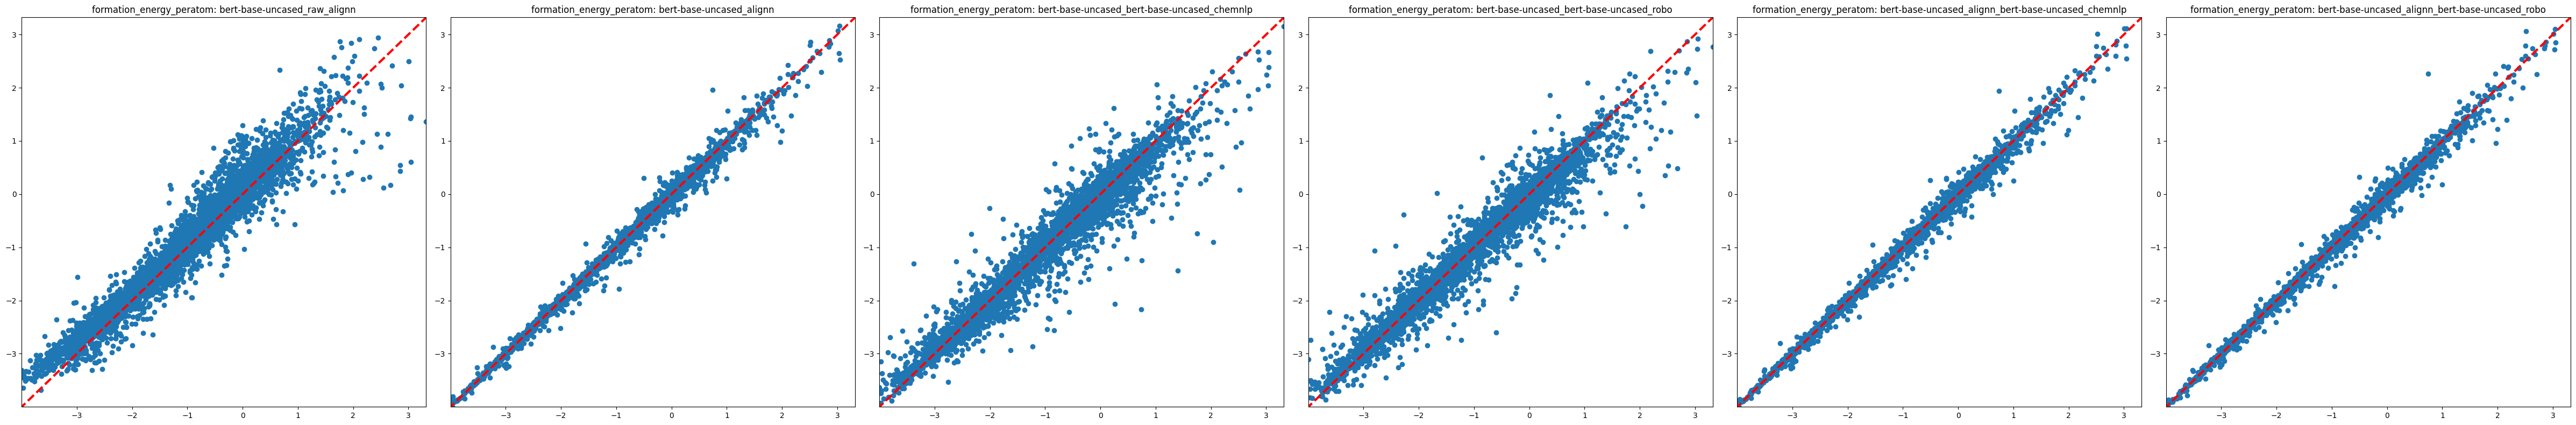

In [3]:
# Create a figure with 4x4 subplots
# props = ['ehull','mbj_bandgap', 'slme', 'spillage', 'magmom_outcar','formation_energy_peratom', 'Tc_supercon']
props = ['formation_energy_peratom']
# columns = ["nn_chemnlp", "nn_robo"]
columns = ["raw_alignn", "alignn", "bert-base-uncased_chemnlp", "bert-base-uncased_robo", 
"alignn_bert-base-uncased_chemnlp", "alignn_bert-base-uncased_robo"]
rows = ["bert-base-uncased"]


# columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo"]
# columns = ["ft_raw", "ft_chemnlp", "ft_robo"]
n_rows = len(rows)
n_cols = len(columns)




# Example data for each subplot
# prop = props[0]

pred_dir = "/scratch/yll6162/CrossPropertyTL/pred/"
for prop in props:

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 8))
    for i in range(n_rows):
        for j in range(n_cols):
            if n_rows == 1:
                axe = axes[j]
            else:
                axe = axes[i, j]
            row = rows[i]
            col = columns[j]
            axe.set_title(f'{prop}: {row}_{col}', fontsize=12)
            if col == "raw_alignn":
                filepath = f"/scratch/yll6162/alignn/{prop}/prediction_results_test_set.csv"
            else:
                filename = "_".join([col, "prop", prop, "pred_otf"]) + '.csv'
                # print(os.path.join(pred_dir, filename))
                filepath = os.path.join(pred_dir, filename)
                
            try:
        
                df = pd.read_csv(filepath, index_col=0)
            except:
                pass
            
            if col == "raw_alignn":
                preds = df["prediction"].values
                labels = df["target"].values
            else:
                preds = df["predictions"].values
                labels = df["labels"].values
            axe.scatter(labels, preds)
            axe.plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
            axe.set_xlim(min(labels), max(labels))
            axe.set_ylim(min(labels), max(labels))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
# plt.savefig(f'prediction_{props[0]}.png')